# Random Forest Classifier - Label 1

Classification on Label 1 (zooplankton vs detritus).

In [1]:
# delete variables in memory
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

Load he data which have been preprocessed in R.

In [3]:
train = pd.read_csv("../../../data/processed/labelled-features/labelled-features-train.csv")
train = train.set_index('index')

test = pd.read_csv("../../../data/processed/labelled-features/labelled-features-test.csv")
test = test.set_index('index')

In [4]:
print(train["label1"].unique())

['zooplankton' 'detritus']


In [5]:
for col in train.columns:
    print(col)

filename
label1
label2
label3
object_label
object_width
object_height
object_bx
object_by
object_circ.
object_area_exc
object_area
object_%area
object_major
object_minor
object_y
object_x
object_convex_area
object_min
object_max
object_mean
object_intden
object_perim.
object_elongation
object_range
object_perimareaexc
object_perimmajor
object_circex
object_angle
object_bounding_box_area
object_eccentricity
object_equivalent_diameter
object_euler_number
object_extent
object_local_centroid_col
object_local_centroid_row
object_solidity
img_file_name
img_rank


These are the columns we are retaining in the features matrix (X)

In [6]:
cols_retain = [ col for col in train.columns if col not in ['filename', 'label1', 'label2', 'label3',
                                                           'img_file_name', 'img_rank'] ]

In [7]:
for col in cols_retain:
    print(col)

object_label
object_width
object_height
object_bx
object_by
object_circ.
object_area_exc
object_area
object_%area
object_major
object_minor
object_y
object_x
object_convex_area
object_min
object_max
object_mean
object_intden
object_perim.
object_elongation
object_range
object_perimareaexc
object_perimmajor
object_circex
object_angle
object_bounding_box_area
object_eccentricity
object_equivalent_diameter
object_euler_number
object_extent
object_local_centroid_col
object_local_centroid_row
object_solidity


Define train and test matrices. First encode labeles.

In [8]:
# Encode taget labels with value between 0 and n_classes-1
LE = LabelEncoder()
LE.fit( train['label1'] ) # fit label encoder
y_train = LE.transform( train['label1'] ) # transform labels to normalized encoding
y_test = LE.transform( test['label1'] ) # transform labels to normalized encoding

Just making sure that the above has worked

In [9]:
( np.sum(y_train == 1) ) == ( np.sum(train['label1'] == 'zooplankton') )

True

In [10]:
( np.sum(y_test == 1) ) == ( np.sum(test['label1'] == 'zooplankton') )

True

In [11]:
X_train = train[cols_retain]  # Features
X_test = test[cols_retain]  # Features

Apply random forest classifier using default settings and make prediction

In [12]:
# Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100) # this is the default number of trees in the forest

# Train the model using the training sets
clf.fit(X_train,y_train)

RandomForestClassifier()

In [13]:
#Make prediction using features in test set
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

Calculate metrics on the random forest model

In [14]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Mean Absolute Error: 0.08711721224920803
Mean Squared Error: 0.08711721224920803
Root Mean Squared Error: 0.2951562505677426
Accuracy: 0.912882787750792


In [15]:
print(metrics.classification_report(y_test,y_pred, target_names=LE.classes_))

              precision    recall  f1-score   support

    detritus       0.94      0.93      0.94      4000
 zooplankton       0.84      0.87      0.85      1682

    accuracy                           0.91      5682
   macro avg       0.89      0.90      0.90      5682
weighted avg       0.91      0.91      0.91      5682



In [16]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

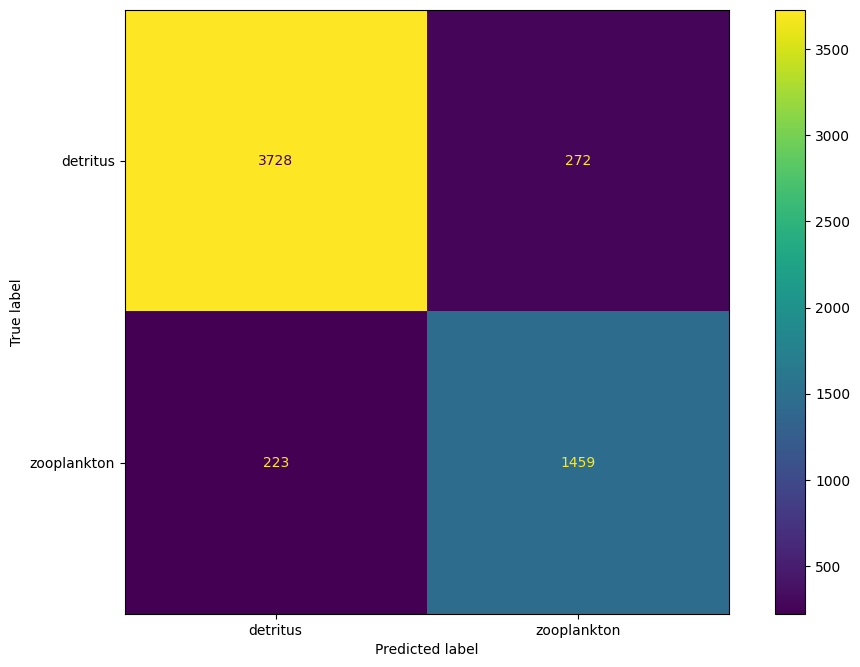

In [17]:
metrics.plot_confusion_matrix(clf, X_test, y_test, display_labels = LE.classes_) 
plt.show()

Find important features for classification

In [18]:
feature_names = X_train.columns
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
print(feature_imp)

object_intden                 0.144922
object_x                      0.084113
object_width                  0.081455
object_perimareaexc           0.072927
object_minor                  0.070929
object_local_centroid_col     0.066692
object_mean                   0.060347
object_max                    0.055895
object_range                  0.053197
object_min                    0.048700
object_bounding_box_area      0.044782
object_convex_area            0.034666
object_area_exc               0.034241
object_area                   0.032821
object_major                  0.019428
object_equivalent_diameter    0.019291
object_circex                 0.011710
object_perim.                 0.011200
object_circ.                  0.010460
object_perimmajor             0.008428
object_elongation             0.007867
object_eccentricity           0.007416
object_local_centroid_row     0.006064
object_y                      0.005938
object_height                 0.004972
object_angle             

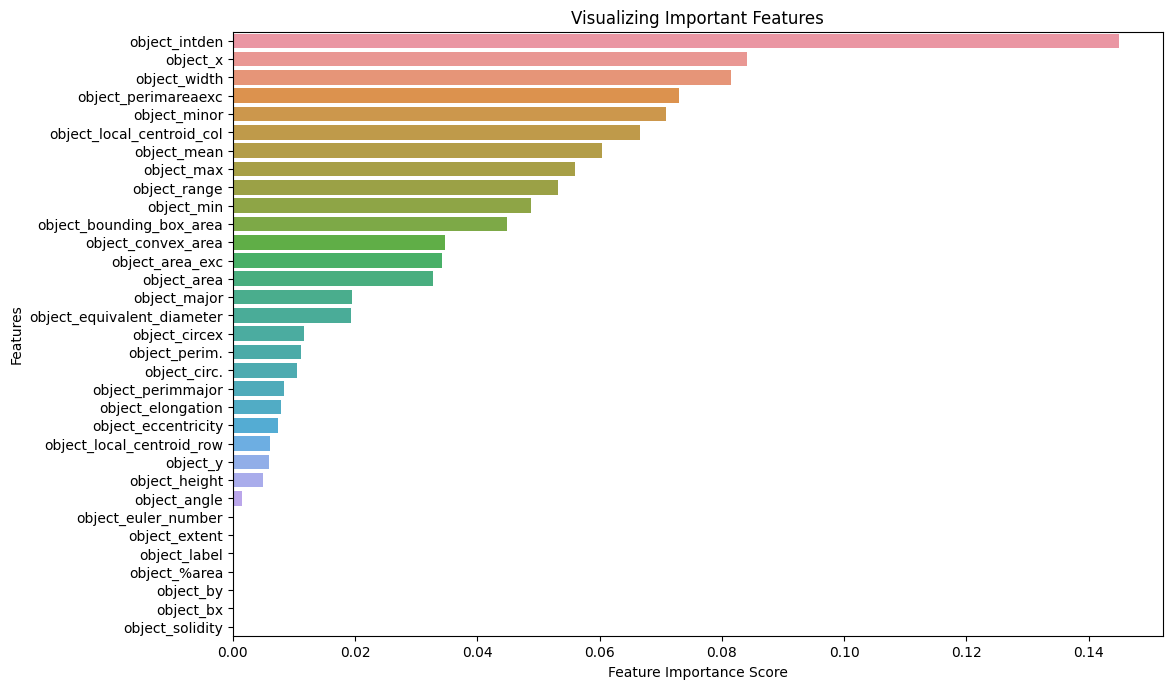

In [19]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Export pre-trained model as pkl file so that it can later be used in scivision

In [20]:
with open('/output/models/randomforest/rf-label1.pkl','wb') as f:
    pickle.dump(clf,f)